# Final Project Phase 1

#### Download the data and load it into Python
***

In [32]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Load the data and print the head to get an idea of the data
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%201/Data/BreastCancerWisconsin.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2


#### Impute missing values
***

In [34]:
#Check to see if any columns contain any question marks
df.isin(['?']).any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
CLASS    False
dtype: bool

In [35]:
#Update all values of ? to NaN and print how many of them were converted
A7 = df['A7'];
df['A7'] = df['A7'].replace("?", np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")


16 of A7 is NaN.


In [36]:
#Calculate the mean and replace all NaN values with it
mean = df['A7'].mean(skipna = True)
print("The mean of column A7 is " + str(mean))


The mean of column A7 is 3.5446559297218156


In [37]:
#Replace all NaN values with the mean and print out the count to confirm they have been replaced
df = df.fillna(mean)
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")

0 of A7 is NaN.


#### Plot basic graphs 
*** 

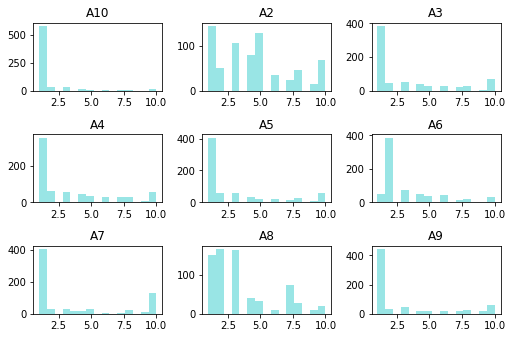

In [38]:
#Slice dataframe to include only columns A2-A10.
dfslice=df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Plot 9 histograms, one for each column of dfslice: 
dfslice.hist(grid=False, bins=15, color='c', alpha=0.4)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

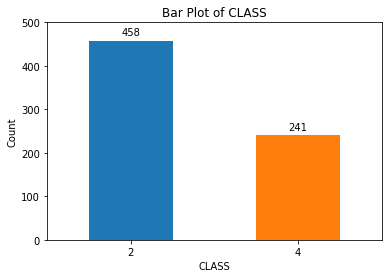

In [39]:
#Bar plot for CLASS 
ax = df['CLASS'].value_counts().plot(kind= 'bar', title= 'Bar Plot of CLASS', rot=0)
ax.set_ylim(0,500)
ax.set_xlabel("CLASS")
ax.set_ylabel("Count")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

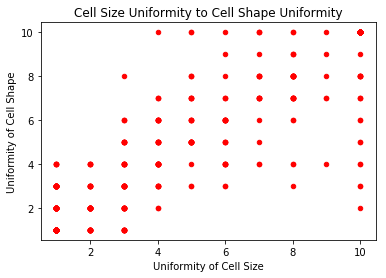

In [40]:
#Scatter plot to see relationship of cell size uniformity to cell shape uniformity

ax = df.plot(kind='scatter', x='A3', y='A4', color='red', title="Cell Size Uniformity to Cell Shape Uniformity")
ax.set_xlabel("Uniformity of Cell Size")
ax.set_ylabel("Uniformity of Cell Shape")
print()

There appears to be some correlation between cell size uniformity and cell shape uniformity.

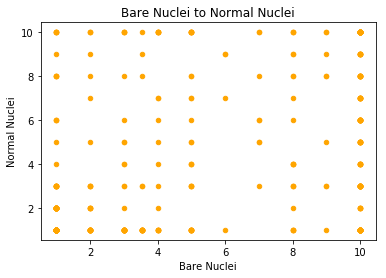

In [41]:
#Scatter plot to see relationship of bare nuclei to normal nuclei

ax = df.plot(kind='scatter', x='A7', y='A9', color='orange', title="Bare Nuclei to Normal Nuclei")
ax.set_xlabel("Bare Nuclei")
ax.set_ylabel("Normal Nuclei")
print()

There is no strong correlation between the bare nuclei and normal nuclei

#### Compute data statistics
***

In [42]:
#Print out summary statistcs of the dataframe
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [43]:
#Print the number of rows and number of columns
num_rows, num_cols = df.shape
print("There are " + str(num_cols) + " columns and " + str(num_rows) + " rows.")

There are 11 columns and 699 rows.


In [44]:
#Report the number of unique ids
unique_count = df['Scn'].unique().size
print("There are " + str(unique_count) + " unique ids in the Scn column")

There are 645 unique ids in the Scn column


#### Mean, Median, Standard Deviation, Variance, and Coefficient of Variation Summary
***

In [45]:
#Create a label dictionary
labelDictionary = {
    "A2": "Clump Thickness",
    "A3": "Uniformity of Cell Size",
    "A4": "Uniformity of Cell Shape",
    "A5": "Marginal Adhesion",
    "A6": "Single Epithelial Cell Size",
    "A7": "Bare Nuclei",
    "A8": "Bland Chromatin",
    "A9": "Normal Nuclei",
    "A10": "Mitoses",
}
# Store coefficient of variation for future use
coefDictionary = {}

# Calculate the mean, median, standard and variance for A2 to A10
for index in df.iloc[:,1:10]:
    print(labelDictionary[index])
    print("********************************************")
    series = df[index]
    mean = series.mean()
    median = series.median()
    std = series.std()
    variance = series.var()
    coef = std/mean
    coefDictionary[labelDictionary[index]] = coef
    print("Mean: {0:.3f}".format(mean))
    print("Median: {0:.0f}".format(median))
    print("Standard Deviation: {0:.3f}".format(std))
    print("Variance: {0:.3f}".format(variance))
    print("Coefficient of variation: {0:.3f}".format(coef))
    if (coef > 1):
        print("WARNING: The variation is high for \"" + labelDictionary[index] + "\" and may need standardization in the future.")
    print()

    

Clump Thickness
********************************************
Mean: 4.418
Median: 4
Standard Deviation: 2.816
Variance: 7.928
Coefficient of variation: 0.637

Uniformity of Cell Size
********************************************
Mean: 3.134
Median: 1
Standard Deviation: 3.051
Variance: 9.311
Coefficient of variation: 0.974

Uniformity of Cell Shape
********************************************
Mean: 3.207
Median: 1
Standard Deviation: 2.972
Variance: 8.832
Coefficient of variation: 0.927

Marginal Adhesion
********************************************
Mean: 2.807
Median: 1
Standard Deviation: 2.855
Variance: 8.153
Coefficient of variation: 1.017

Single Epithelial Cell Size
********************************************
Mean: 3.216
Median: 2
Standard Deviation: 2.214
Variance: 4.903
Coefficient of variation: 0.689

Bare Nuclei
********************************************
Mean: 3.545
Median: 1
Standard Deviation: 3.602
Variance: 12.973
Coefficient of variation: 1.016

Bland Chromatin
********

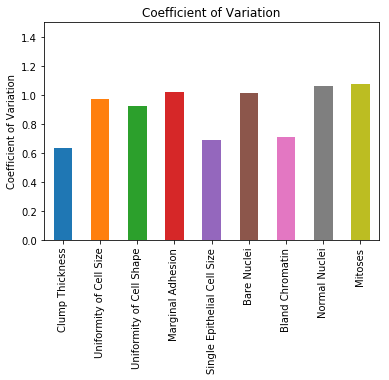

In [46]:
# Display bar chart of coefficient of variation for each feature
coefSeries = pd.Series(coefDictionary)
ax = coefSeries.plot(kind= 'bar', title= 'Coefficient of Variation')
ax.set_ylabel("Coefficient of Variation")
ax.set_ylim(0,1.5)
print()

#### Summary Report
"Marginal Adhesion", "Bare Nuclei", "Normal Nuclei" and "Mitoses" have higher levels of variation and should be considered for more variation in the next phase.